# 2차원 벡터

## 2.1 2차원 벡터 그리기

In [1]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *

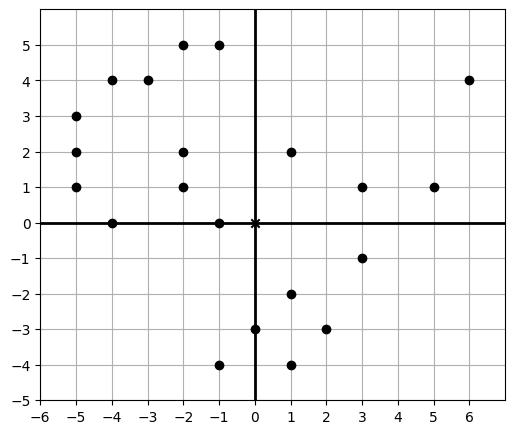

In [2]:
dino_vectors = [(6,4), (3,1), (1,2), (-1,5), (-2,5), (-3,4), (-4,4),
    (-5,3), (-5,2), (-2,2), (-5,1), (-4,0), (-2,1), (-1,0), (0,-3),
    (-1,-4), (1,-4), (2,-3), (1,-2), (3,-1), (5,1)
]

draw(
    Points(*dino_vectors)
)

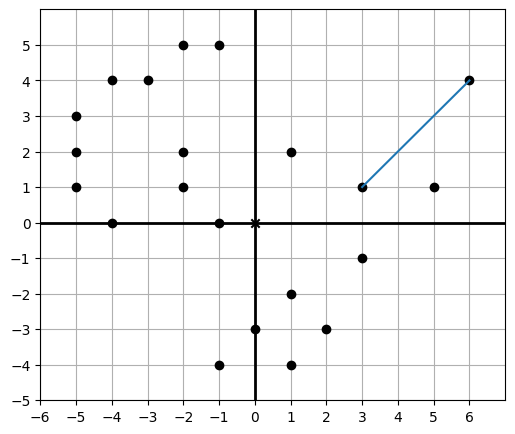

In [6]:
draw(
    Points(*dino_vectors),
    Segment((6,4),(3,1))
)

**EXERCISE:** `dino_vectors`를 연결하여 `Polygon` 함수를 이용하여 공룡을 그려봅시다. 

In [ ]:
draw(
    Points(*dino_vectors),
    # 함수를 입력
)

**EXERCISE** `[(x,x**2) for x in range(-10,11)]` 를 정점으로 하는 그래프를 그리시오.

In [ ]:
draw(
    # 정점을 입력
    grid=(1,10),
    nice_aspect_ratio=False
)

# 2차원 벡터 산술 연산

In [4]:
def add(v1,v2):
    return (v1[0] + v2[0], v1[1] + v2[1])

In [5]:
dino_vectors2 = [add((-1.5,-2.5), v) for v in dino_vectors]

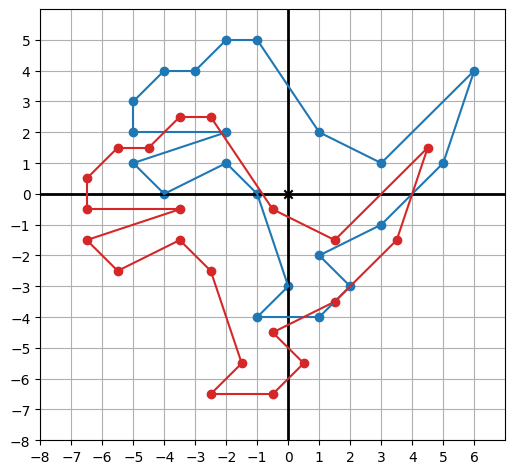

In [11]:
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red)
)

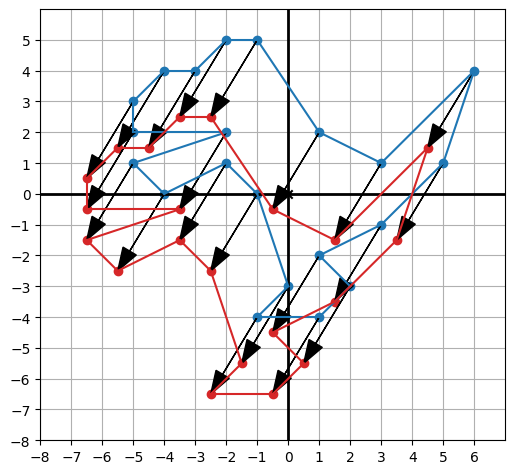

In [6]:
arrows = [Arrow(tip,tail,color=black) for (tip,tail) in
         zip(dino_vectors2, dino_vectors)]
draw(
    Points(*dino_vectors, color=blue),
    Polygon(*dino_vectors, color=blue),
    Points(*dino_vectors2, color=red),
    Polygon(*dino_vectors2, color=red),
    *arrows
)

## 벡터 원소와 길이

In [7]:
from math import sqrt
def length(v):
    return sqrt(v[0]**2 + v[1]**2) 

## 빼기와 거리

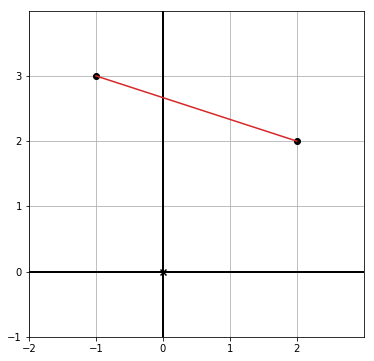

In [ ]:
draw(
    Points((2,2), (-1,3)),
    Segment((2,2), (-1,3), color=red)
)

**EXERCISE:** 벡터 `v`에 스칼라 `s`를 곱하는 `scale(s, v)` 함수를 작성하시오.

**MINI-PROJECT:** 벡터 $\vec{u} = (-1,1)$ , $\vec{v} = (1,1)$ 를 정의하고 $r$ , $s$ 는 실수라고 할때 ($-1 < r < 1$ 이고 $-3 < s < 3$ 이다.) 

$r \cdot \vec{u} + s \cdot \vec{v}$ 의 모양은 어떠할까? 

범위에 있는 수를 똑같은 확률로 뽑는 uniform 함수를 사용하여 그려보자.

In [ ]:
from random import uniform
u = (-1,1)
v = (1,1)
def random_r():
    return uniform(-3,3)
def random_s(): 
    return uniform(-1,1)
possibilities = # 자신이 원하는 수 만큼의 점을 생성해 보자.
draw(
    Points(*possibilities)
)

**EXERCISE:** 빼기 함수 `subtract(v1,v2)` 를 작성해보자. `v1` - `v2` 이다.

In [ ]:
def subtract(v1,v2):
    return (v1[0] - v2[0], v1[1] - v2[1])

**EXERCISE:** 두 벡터의 거리를 구하는 `distance(v1,v2)` 함수를 작성하시오. (힌트: subtract와 length 2개의 함수를 이용하면 된다.)

In [ ]:
def distance(v1,v2):
    return length(subtract(v1,v2))